### 넘파이의 다차원 배열

In [5]:
import numpy as np
from numpy.typing import NDArray
x = np.array([1, 2, 3])

def describe(x: NDArray) -> None:
    """
    describe a numpy array
    """
    print(f"x.__class__: {x.__class__}")
    print(f"x.shape: {x.shape}")
    print(f"x.ndim: {x.ndim}")
    return None

describe(x)

x.__class__: <class 'numpy.ndarray'>
x.shape: (3,)
x.ndim: 1


In [6]:
W = np.array([[1, 2, 3], [4, 5, 6]])
describe(W)

x.__class__: <class 'numpy.ndarray'>
x.shape: (2, 3)
x.ndim: 2


#### elementwise 연산

In [8]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

print(W + X)
print("-"* 3)
print(W * X) # <- this is called Hadaamard product

[[ 1  3  5]
 [ 7  9 11]]
---
[[ 0  2  6]
 [12 20 30]]


#### 내적과 행렬곱

In [9]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)
print(y)
print("-"* 3)
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
Y = np.dot(A, B)
print(Y)

32
---
[[19 22]
 [43 50]]


In [10]:
print(a @ b)
print(A @ B)

32
[[19 22]
 [43 50]]


### MultiVariate Gaussian Distributions

- $$ x = [x_1, x_2, \dots, x_D]^T $$

- $$ N(x; \mu, \Sigma) = \frac{1}{\sqrt{(2 \pi)^D |\Sigma|}} \exp \left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right) $$

- 평균 벡터: $ \mu $
- 공분산 행렬: $ \Sigma $
- 추후 다루게될 VAE 같은 모델에서는 잠재변수의 공분산 행렬은 취급하지 않는 경우가 많음.
- 대각성분에만 값이 존재하고 그외는 0이된다는 뜻.

In [11]:
# 행렬의 전치
A = np.array([[1, 2], [3, 4]])
print(A)
print("-" * 3)
print(A.T)

[[1 2]
 [3 4]]
---
[[1 3]
 [2 4]]


In [13]:
# 행렬식의 계산
A = np.array([[1, 2], [3, 4]])
d = np.linalg.det(A)
print(d) # 오차는 LU decomposition 때문에 발생한다고 함

-2.0000000000000004


In [19]:
# 역행렬
A = np.array([[1, 2], [3, 4]])
A_inv = np.linalg.inv(A)
print(A_inv)
print((A @ A_inv).round(1)) # < Identity matrix

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1. 0.]
 [0. 1.]]


#### 다변량 정규분포의 표현

In [20]:
import numpy.typing as npt

def multivariate_normal(x, mu: npt.NDArray[np.float32], cov:npt.NDArray[np.float32]) -> np.float32:
    """
    x: (n, )
    mu: (n, )
    cov: (n, n)
    """
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    y = 1 / (np.sqrt((2 * np.pi) ** D * det))
    y *= np.exp(-0.5 * (x - mu).T @ inv @ (x - mu))
    return y 

In [21]:
x = np.array([[0], [0]])
mu = np.array([[1], [2]])
cov = np.identity(2)

y = multivariate_normal(x, mu, cov)
y

array([[0.01306423]])

#### Visualization

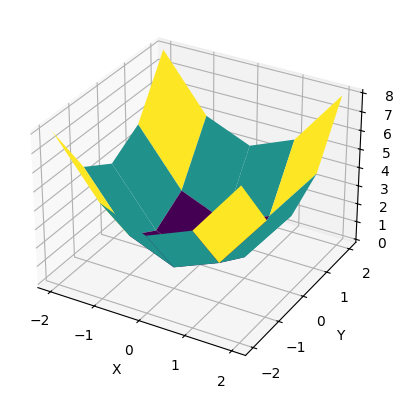

In [25]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2]
])

Y = np.array([
    [-2, -2, -2, -2, -2],
    [-1, -1, -1, -1, -1],
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2]
])
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis') # type: ignore
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z') # type: ignore
plt.savefig('./result_images/3d-1.png')
plt.show()

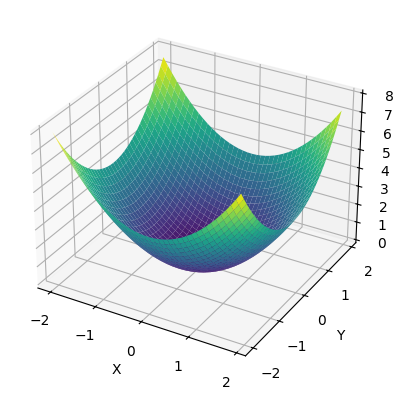

In [26]:
xs = np.arange(-2, 2, .1)
ys = np.arange(-2, 2, .1)
X, Y = np.meshgrid(xs, ys)
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis') # type: ignore
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z') # type: ignore
plt.savefig('./result_images/3d-2.png')
plt.show()


#### 등고선으로 그리기

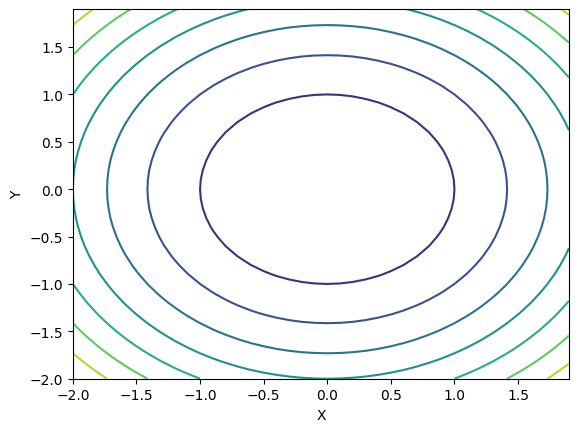

In [29]:
x = np.arange(-2, 2, .1)
y = np.arange(-2, 2, .1)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.savefig('./result_images/contour-1.png')
plt.show()

#### 다변량 정규분포의 시각화

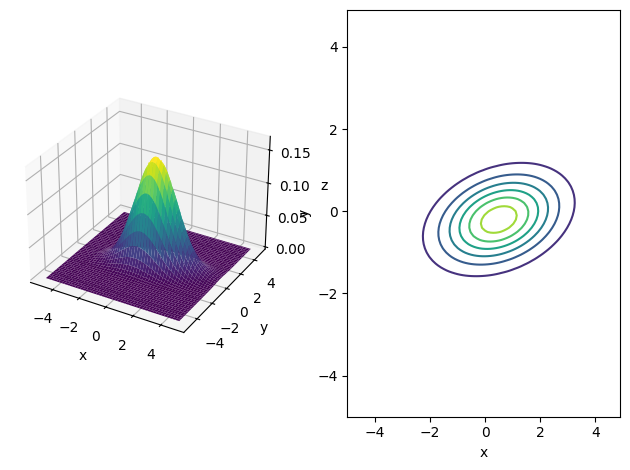

In [57]:
mu = np.array([.5, -.2])
cov = np.array([[2.0, .3], [.3, .5]])

xs = ys = np.arange(-5, 5, .1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.tight_layout()
plt.savefig('./result_images/multivariate with contour.png')
plt.show()

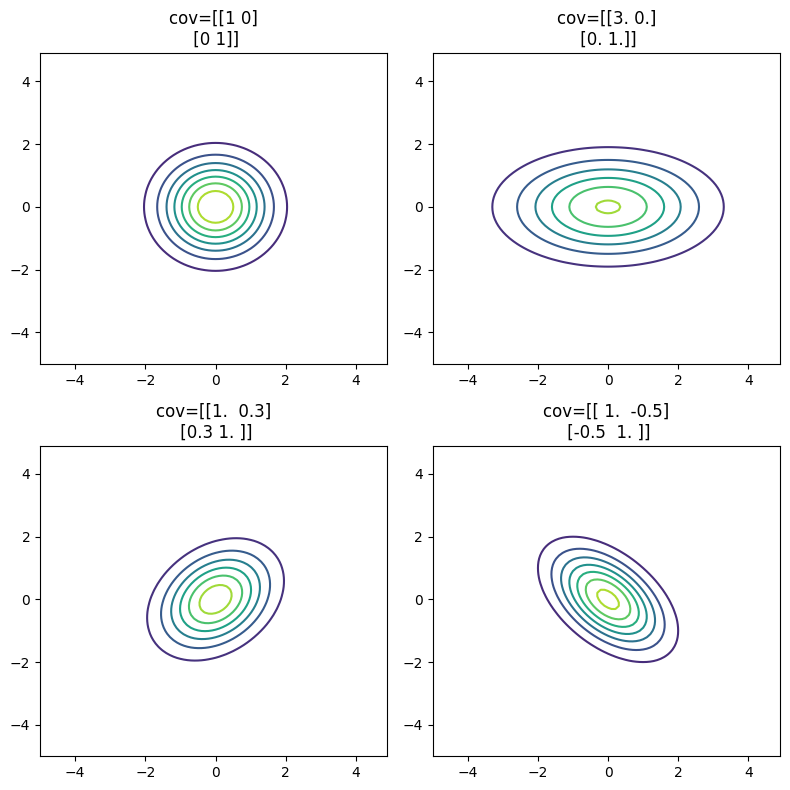

In [45]:
plt.figure(figsize=(8, 8))

mu = np.array([0.0, 0.0])
COVS = [
    np.array([[1, 0], [0, 1]]), 
    np.array([[3.0, 0.0], [0.0, 1.0]]), 
    np.array([[1.0, 0.3], [0.3, 1.0]]),
    np.array([[1.0, -0.5], [-0.5, 1.0]]),
]

for i, COV in enumerate(COVS):
    plt.subplot(2, 2, i + 1)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = np.array([X[i, j], Y[i, j]])
            Z[i, j] = multivariate_normal(x, mu, COV)
    plt.contour(X, Y, Z)
    plt.title(f'cov={COV}')
plt.tight_layout()
plt.savefig('./result_images/multivariate-with-contour-for-cov.png')
plt.show()


- 다변량 정규분포의 MLE, mu와 Sigma의 추정, 증명 생략

$$ \boldsymbol{\hat{\mu}} = \frac{1}{N} \sum_{n=1}^{N} \mathbf{x}^{n} $$
$$ \boldsymbol{\hat{\Sigma}} = \frac{1}{N} \sum_{n=1}^{N} (\mathbf{x}^{n} - \boldsymbol{\hat{\mu}})(\mathbf{x}^{n} - \boldsymbol{\hat{\mu}})^T $$


In [50]:
import numpy as np

np.random.seed(0)

N = 10000
D = 2
xs = np.random.rand(N, D)

# > calculate mean
mu = np.sum(xs, axis=0)
mu /= N

# > calculate covariance
cov = np.zeros((D, D))
for n in range(N):
    x = xs[n]
    z = x - mu
    z = z[:, np.newaxis]
    cov += z @ z.T

cov /= N

print(mu)
print("---")
print(cov)

[0.49443495 0.49726356]
---
[[ 0.08476319 -0.00023128]
 [-0.00023128  0.08394656]]


### real_data

In [59]:
path = "height_weight.txt"
xs = np.loadtxt(path)

print(xs.shape)

(25000, 2)


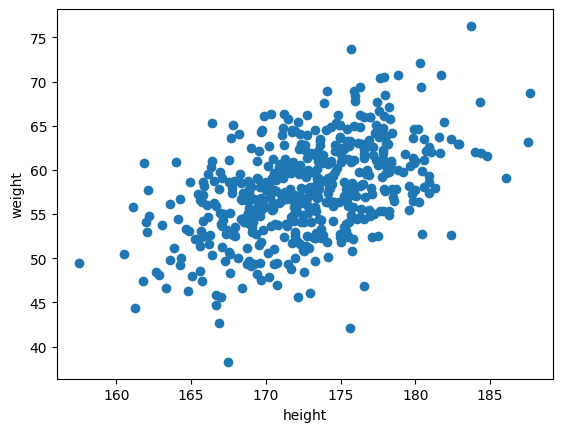

In [60]:
small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

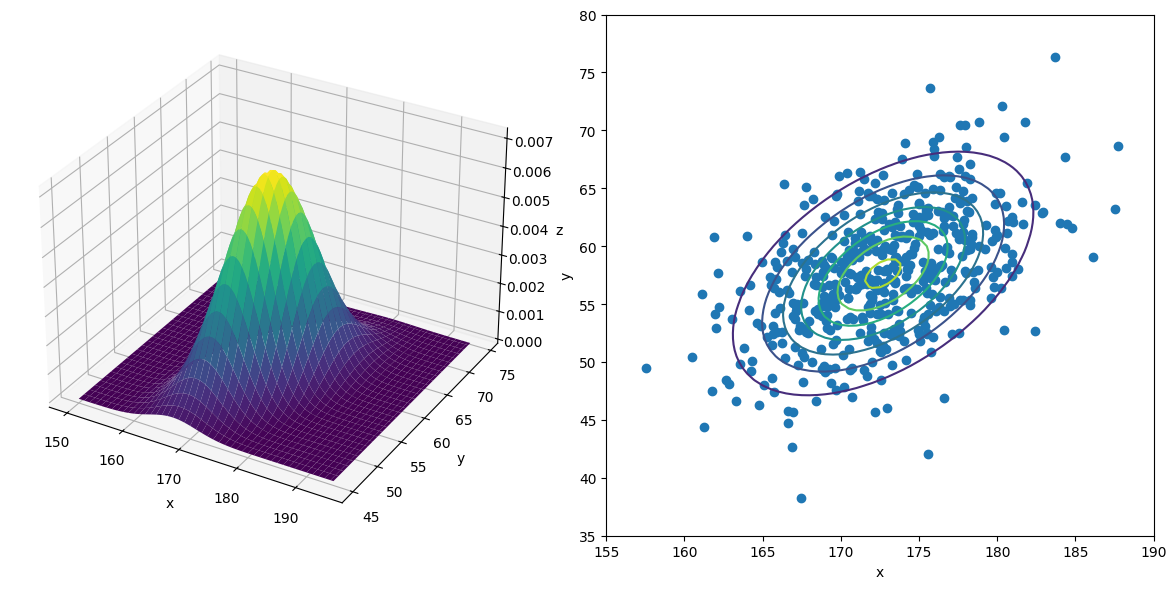

In [73]:
xs = np.loadtxt(path)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

xs = np.arange(150.0, 195.0, .5)
ys = np.arange(45.0, 75.0, .5)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_ylim(35, 80)
ax2.set_xlim(155, 190)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
ax2.scatter(small_xs[:, 0], small_xs[:, 1])
plt.tight_layout()
plt.savefig('./result_images/multivariate-height-weight.png')
plt.show()